# Sale Prediction using Logistic Regression

This code is a Python script for building a logistic regression model to predict whether a new customer will buy a product or not based on their age and salary. The script loads a dataset, splits it into training and testing sets, performs feature scaling, trains a logistic regression model on the training data, and evaluates the model's performance on the test data. It also allows the user to input the age and salary of a new customer and predicts whether they will buy or not. Finally, it prints the confusion matrix and accuracy of the model on the test data.

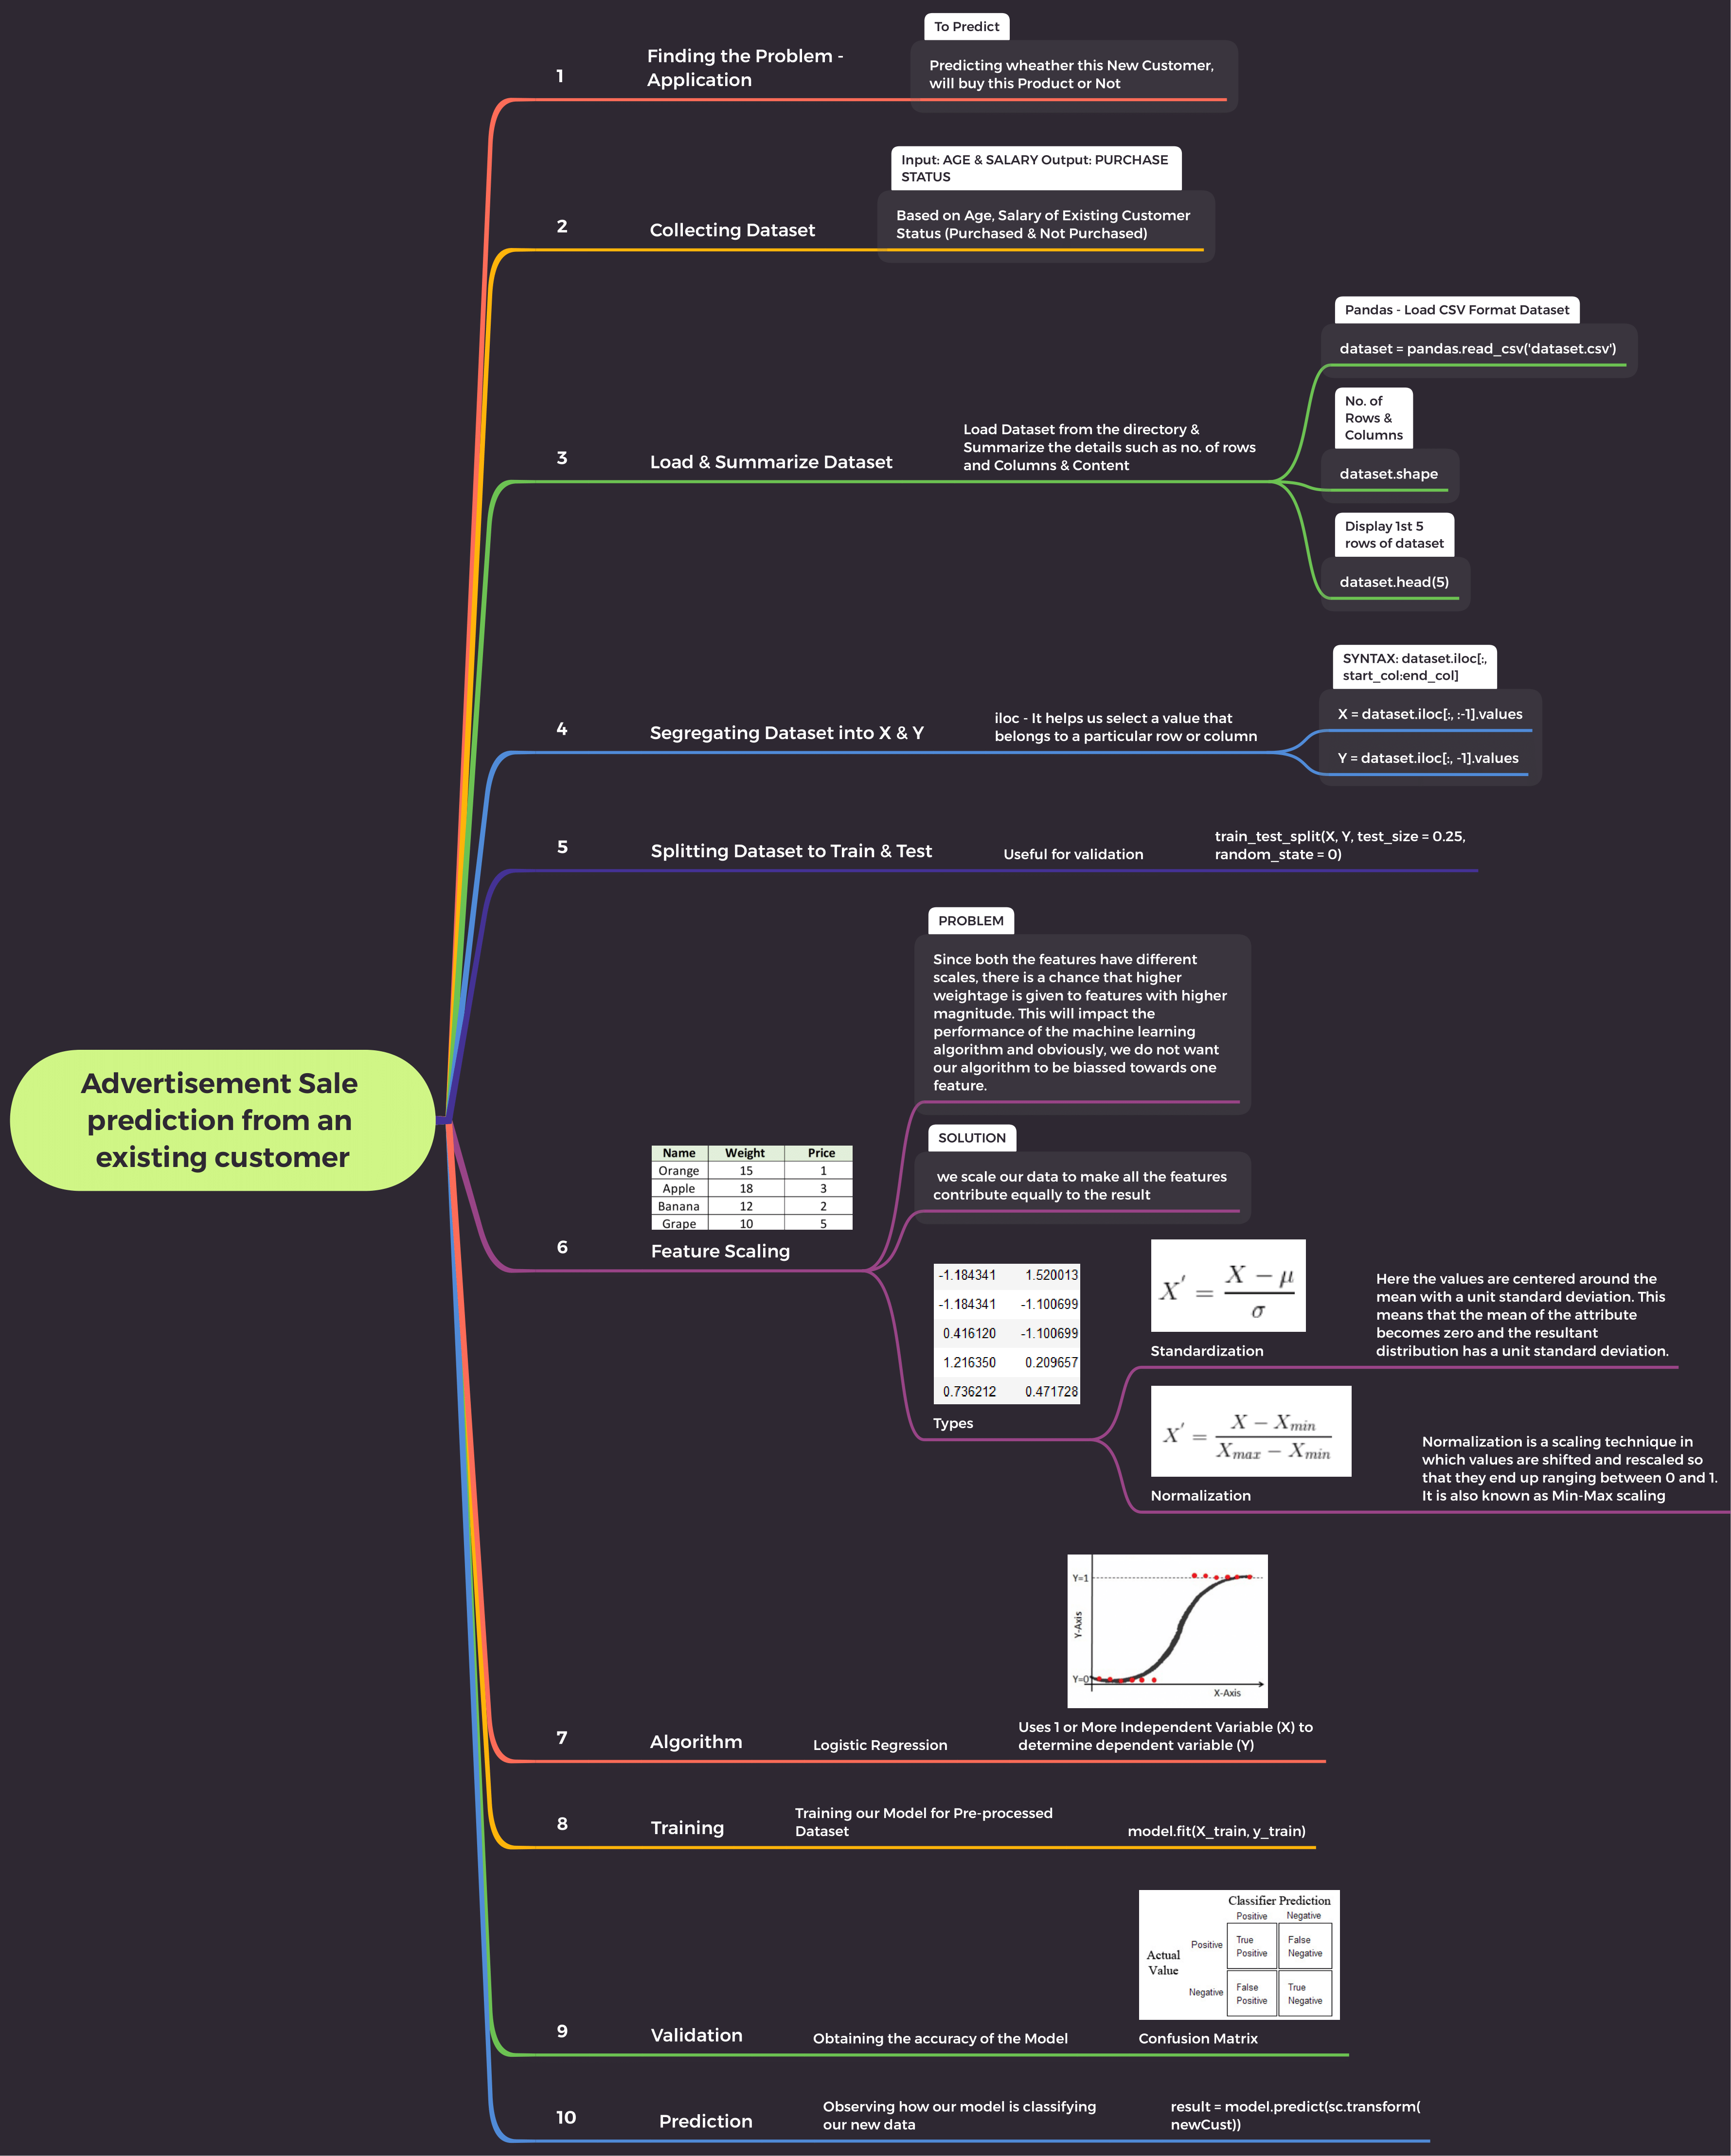

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Choose dataset file from local directory
uploaded = files.upload()

Saving DigitalAd_dataset.csv to DigitalAd_dataset.csv


In [3]:
# Load dataset
dataset = pd.read_csv('DigitalAd_dataset.csv')

In [4]:
# Segregate dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)
X, Y = dataset.iloc[:, :-1].values, dataset.iloc[:, -1].values

In [5]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [6]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [7]:
# Training
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [8]:
# Predict whether new customer with Age & Salary will Buy or Not
age = int(input("Enter New Customer Age: "))
sal = int(input("Enter New Customer Salary: "))
newCust = [[age, sal]]
newCust_transformed = sc.transform(newCust)
result = model.predict(newCust_transformed)
if result == 1:
    print("Customer will Buy")
else:
    print("Customer won't Buy")

Enter New Customer Age: 20
Enter New Customer Salary: 40000
Customer won't Buy


In [9]:
# Prediction for all Test Data
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [10]:
# Model evaluation
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy of the Model: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Confusion Matrix:
[[61  0]
 [20 19]]
Accuracy of the Model: 80.00%
